In [3]:
%matplotlib inline
from skimage.io import  imshow, imsave, imread
import os
from skimage import img_as_float
from skimage.color import rgb2gray

(1075, 419)


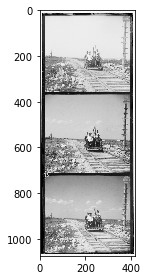

In [4]:
img = imread('data/Prokudin_Gorskiy.png')
print(img.shape)
imshow(img)

In [6]:
1074/3

358.0

(358, 419)


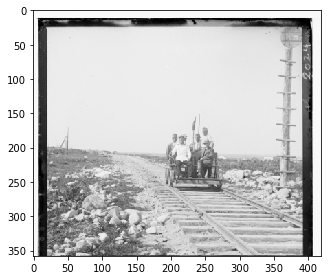

In [13]:
b = img[:int(1074/3)*1,:]
print(b.shape)
imshow(b)

(358, 419)


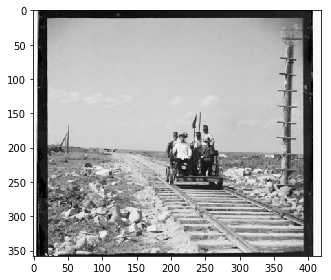

In [14]:
g = img[int(1074/3)*1:int(1074/3)*2,:]
print(g.shape)
imshow(g)

(358, 419)


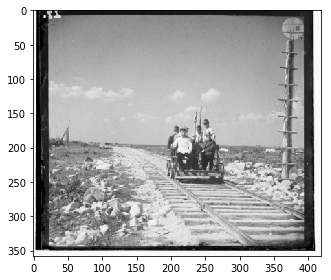

In [15]:
r = img[int(1074/3)*2:int(1074/3)*3,:]
print(r.shape)
imshow(r)

In [20]:
def cutting_img(img, percent):
    return img[int(percent * img.shape[0]): int((1-percent) * img.shape[0]) , int(percent * img.shape[1]): int((1-percent) * img.shape[1])]

In [26]:
r_cutted = cutting_img(r,0.05)
g_cutted = cutting_img(g,0.05)
b_cutted = cutting_img(b,0.05)

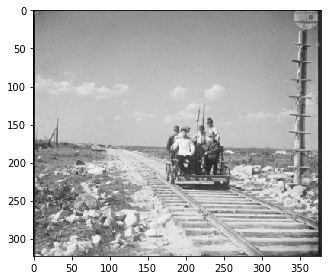

In [27]:
imshow(r_cutted)

In [34]:
print(g_cutted.shape)
g_cutted

(323, 378)


array([[ 14, 136, 157, ...,  34,  33,  34],
       [ 13, 137, 157, ...,  32,  33,  35],
       [ 15, 143, 158, ...,  32,  34,  37],
       ..., 
       [ 26,  26,  80, ...,  31,  37,  33],
       [ 24,  27, 112, ...,  32,  31,  38],
       [ 27,  29, 132, ...,  31,  30,  31]], dtype=uint8)

In [41]:
r_cutted = img_as_float(r_cutted)
g_cutted = img_as_float(g_cutted)
b_cutted = img_as_float(b_cutted)

In [55]:
import pandas as pd
results = pd.DataFrame()
results

""


In [69]:
def define_best_roll(pic_to_roll, n_roll, perfect):
    results = pd.DataFrame()
    for row in range(0,n_roll+1):
        #print(row)
        img_new_row = np.roll(pic_to_roll, row, axis=0)
        for col in range(0,n_roll+1):
            #print(col)
            img_new_col = np.roll(img_new_row, col, axis=1)
            correlation = (perfect * img_new_col).sum()
            #print(correlation)
            results = results.append([[row,col,correlation]], ignore_index=True)
    print(results[results[2] == max(results[2])])
    img_res = np.roll(r_cutted, results[results[2] == max(results[2])][0], axis=0)
    img_res = np.roll(img_res, results[results[2] == max(results[2])][1], axis=1)
    return img_res

In [61]:
results[results[2] == max(results[2])]

,0,1,2
144,9,0,57615.383514


     0  1             2
144  9  0  57615.383514


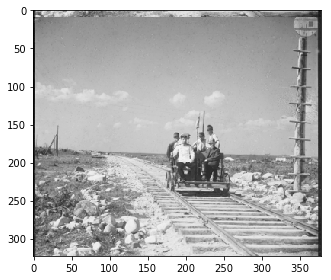

In [70]:
r_res = define_best_roll(r_cutted, 15, g_cutted)
imshow(r_res)

   0  1             2
1  0  1  68102.225098


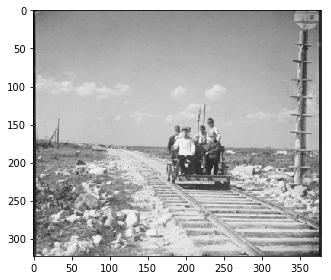

In [72]:
b_res = define_best_roll(b_cutted, 15, g_cutted)
imshow(b_res)

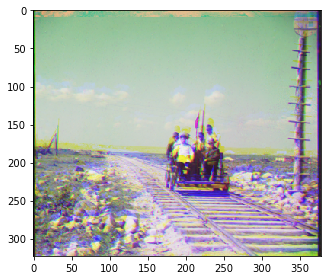

In [74]:
from numpy import dstack
img_combined = dstack(tup=(r_res,g_cutted,b_res))
imshow(img_combined)